In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')


data = pd.read_excel('/content/drive/MyDrive/Introduction of MachineLearning/raw_data.xlsx')
data = data.drop(0)
display(data)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,symbol,EEM SNQLASP67O85,EFA S79U6IHK5HLX,IEF SGNKIKYGE9NP,ITF S96RH23DIAUD,SPY R735QTJ8XC9X,TLT SGNKIKYGE9NP,XLK RGRPZX100F39
1,2022-07-13 00:00:00,38.286130,61.084686,100.728620,55.990764,376.101996,112.713209,128.279449
2,2022-07-14 00:00:00,38.197482,61.054806,101.160889,55.658312,374.126826,114.005612,127.942002
3,2022-07-15 00:00:00,37.852739,60.198246,100.600904,55.111928,373.218247,113.075474,129.113141
4,2022-07-16 00:00:00,38.049735,61.154406,100.944754,55.655325,380.348611,113.711884,131.385945
5,2022-07-19 00:00:00,38.315679,61.403406,100.650025,55.828622,377.208091,112.527181,130.115557
...,...,...,...,...,...,...,...,...
196,2023-04-21 00:00:00,39.380000,73.260000,98.810000,62.663500,411.880000,104.990000,148.240000
197,2023-04-22 00:00:00,39.010000,73.630000,98.570000,63.060700,412.200000,104.400000,147.760000
198,2023-04-25 00:00:00,38.920000,73.820000,99.050000,63.083200,412.630000,105.410000,147.110000
199,2023-04-26 00:00:00,38.190000,72.790000,100.030000,62.655700,406.080000,106.960000,143.970000


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)
feature_column = 'SPY R735QTJ8XC9X'
data = data[[feature_column]]

# data normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# define training window size and forecast steps
window_size = 20
forecast_steps = 9


X_train = []
y_train = []
for i in range(len(data_scaled) - window_size - forecast_steps + 1):
    X_train.append(data_scaled[i:i + window_size])
    y_train.append(data_scaled[i + window_size:i + window_size + forecast_steps])

X_train = np.array(X_train)
y_train = np.array(y_train)

# LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(forecast_steps))

model.compile(optimizer='adam', loss='mse')

In [25]:
# train
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 2s 14ms/step - loss: 0.3271
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 0.2714
Epoch 3/10
6/6 [==============================] - 0s 13ms/step - loss: 0.2116
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 0.1367
Epoch 5/10
6/6 [==============================] - 0s 16ms/step - loss: 0.1089
Epoch 6/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0737
Epoch 7/10
6/6 [==============================] - 0s 17ms/step - loss: 0.0547
Epoch 8/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0450
Epoch 9/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0385
Epoch 10/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0366


In [26]:
input_data = data_scaled[-window_size:].reshape(1, window_size, 1)
predictions = model.predict(input_data)


predictions = scaler.inverse_transform(predictions.reshape(-1, forecast_steps))


predictions = np.delete(predictions, [7,8])
print('预测值:', predictions)

1/1 [==============================] - 0s 181ms/step
预测值: [408.43158 408.75772 409.97006 409.94324 403.38025 405.8916  405.88696]


In [27]:
y_true = pd.read_excel('/content/drive/MyDrive/Introduction of MachineLearning/test_data.xlsx')
time_test = y_true['time']
y_true = y_true['SPY'].values
print(y_true)

[410.883382 414.390352 413.971907 409.319194 406.509632 403.63033
 411.102568]


In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 17,481
Trainable params: 17,481
Non-trainable params: 0
_________________________________________________________________


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_true, predictions)
mae = mean_absolute_error(y_true, predictions)
rmse = mean_squared_error(y_true, predictions, squared=False)

print("MSE:{:.4f}".format(mse))
print("MAE:{:.4f}".format(mae))
print("RMSE:{:.4f}".format(rmse))

MSE:13.7501
MAE:3.3309
RMSE:3.7081


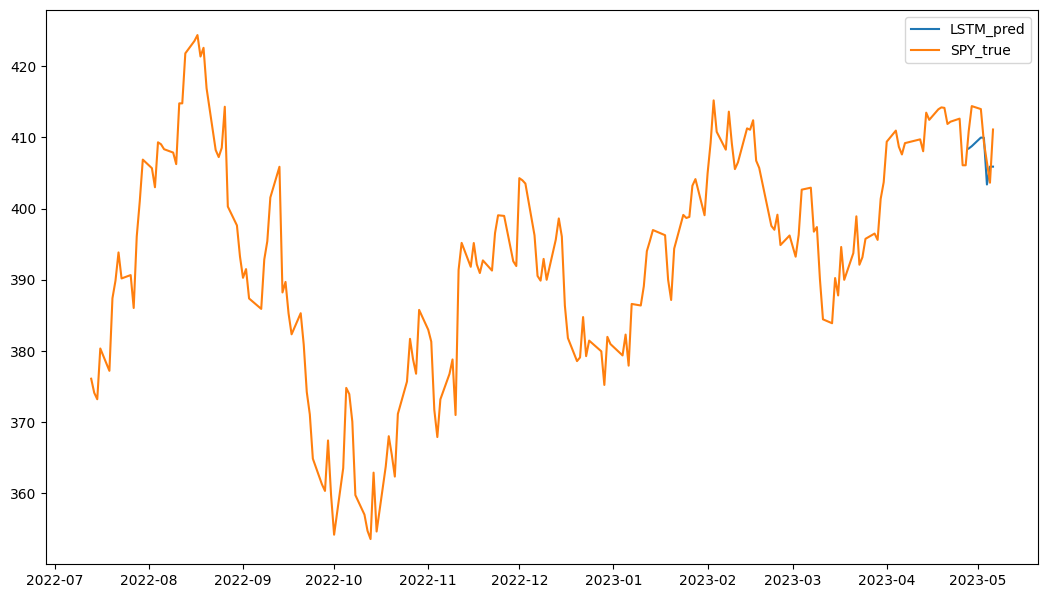

<Figure size 1280x720 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.8, 7.2)
y1 = predictions
plt.plot(time_test,y1)

y2 = pd.read_excel('/content/drive/MyDrive/Introduction of MachineLearning/SPY_true.xlsx')['SPY'].values
time_SPY = pd.read_excel('/content/drive/MyDrive/Introduction of MachineLearning/SPY_true.xlsx')['time']
plt.plot(time_SPY,y2)

plt.legend(["LSTM_pred","SPY_true"],shadow=False,fancybox="blue")
plt.show()
plt.savefig("Prophet.png")